# Case Study on Probability for Data Science

**Problem Statement:**

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p)using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also,if some data pre-processing is necessary do that as well.

**Attribute Information:**

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
• bruises: bruises=t, no=f 
• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
• gill-attachment: attached=a, descending=d, free=f, notched=n 
• gill-spacing: close=c, crowded=w, distant=d 
• gill-size: broad=b, narrow=n 
• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
• stalk-shape: enlarging=e, tapering=t 
• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
• veil-type: partial=p, universal=u 
• veil-colour: brown=n, orange=o, white=w, yellow=y 
• ring-number: none=n, one=o, two=t 
• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data=pd.read_csv(r'C:\Users\NIDHIN\Desktop\Dataset\w15\mushrooms.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
It is a categorical data, So we will use Encoding to convert it to ordinal. 

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
#Encoding
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


Text(0.5, 1.0, 'Heatmap')

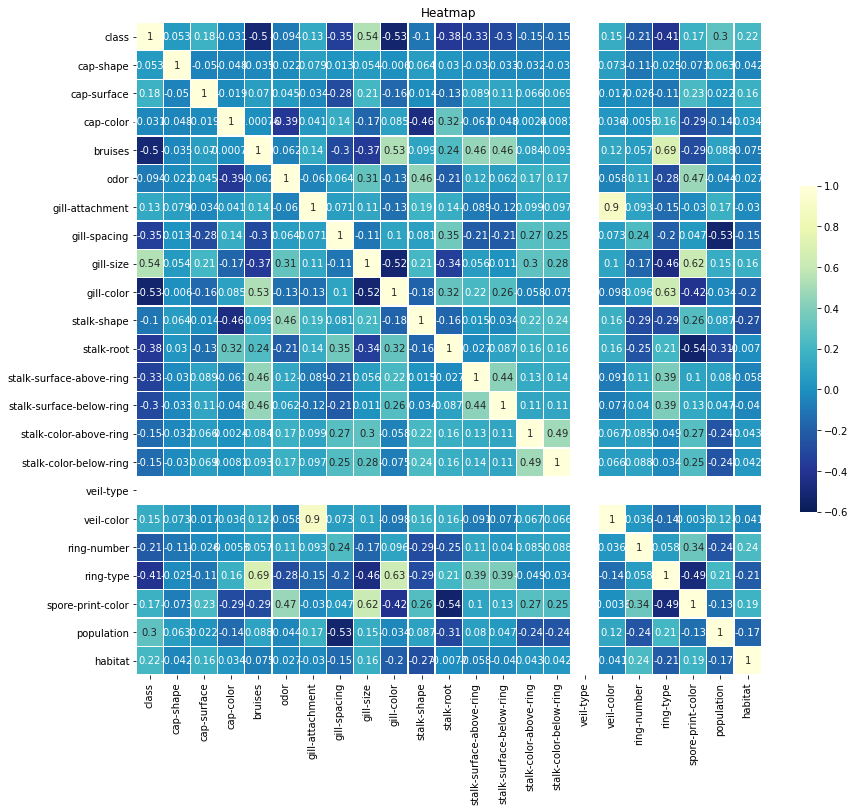

In [8]:
corr=data.corr()#'YlGn_r',
plt.figure(figsize=(14,12))
sns.heatmap(corr,vmin=-.6,vmax=1,linewidth=.2,cmap='YlGnBu_r',annot=True,cbar_kws={"shrink":.5})
plt.title("Heatmap")

From this, We can see that veil-type is highly correlated and hence won't contribute much to our prediction, 
So we can safely remove it

In [9]:
data = data.drop(["veil-type"],axis=1)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [10]:
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

<AxesSubplot:>

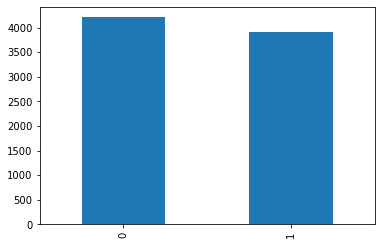

In [12]:
data['class'].value_counts().plot(kind='bar')

**Insights:**
   More than 50% of mushrooms belongs to **poisonous class** while remaining belongs to edible class.

In [13]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Splitting into feature set and class labels

In [14]:
x=data.iloc[:,1:].values 
y=data.iloc[:,0].values #target variable

In [16]:
x

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [17]:
y

array([1, 0, 0, ..., 0, 1, 0])

# Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Classification Methods

1. Logistic Regression
2. KNN Classifier
3. SVM
4. Decision Tree
5. Random Forest Classifier
6. Naive Bayes Classifier

**Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
Lr=LogisticRegression(max_iter=500)
model=Lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1038
           1       0.95      0.95      0.95       993

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [23]:
print("Accuracy: {}%".format(round(Lr.score(x_test,y_test)*100,2)))

Accuracy: 95.08%


In [24]:
print(confusion_matrix(y_pred,y_test))

[[989  49]
 [ 51 942]]


**KNN Classifier**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

value=[]
nbs=np.arange(3,15)
for k in nbs:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model=knn.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(pred,y_test)
    value.append(acc)
value

[0.9980305268340719,
 0.9970457902511078,
 0.9960610536681438,
 0.9965534219596258,
 0.9955686853766618,
 0.9950763170851797,
 0.9960610536681438,
 0.9945839487936977,
 0.9935992122107337,
 0.9931068439192516,
 0.9926144756277696,
 0.9940915805022157]

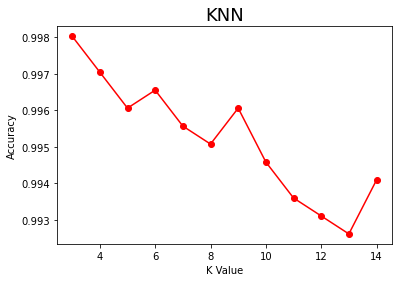

In [37]:
plt.plot(nbs,value,'o-',color='r')
plt.title('KNN',fontsize=18)
plt.xlabel('K Value')
plt.ylabel('Accuracy');

In [33]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model=knn.fit(x_train,y_train)
predi=model.predict(x_test)
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       993

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [39]:
print("Accuracy: {}%".format(round(knn.score(x_test,y_test)*100,2)))

Accuracy: 99.8%


In [42]:
print(confusion_matrix(predi,y_test))

[[1037    1]
 [   3  990]]


**SVM**

In [43]:
from sklearn import svm
sv=svm.SVC()
model=sv.fit(x_train,y_train)
pred_y=model.predict(x_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1052
           1       0.99      1.00      0.99       979

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [44]:
print("Accuracy: {}%".format(round(sv.score(x_test,y_test)*100,2)))

Accuracy: 99.21%


In [50]:
print(confusion_matrix(pred_y,y_test))

[[1038   14]
 [   2  977]]


**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
model=dtree.fit(x_train,y_train)
ypred=model.predict(x_test)
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [47]:
print("Accuracy: {}%".format(round(dtree.score(x_test,y_test)*100,2)))

Accuracy: 100.0%


In [49]:
print(confusion_matrix(ypred,y_test))

[[1040    0]
 [   0  991]]


**Random Forest Classifier**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [52]:
print("Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Accuracy: 100.0%


In [53]:
print(confusion_matrix(pred_y,y_test))

[[1040    0]
 [   0  991]]


**Naive Bayes Classifier**

In [56]:
#Gaussian
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model=gnb.fit(x_train, y_train)
predn=model.predict(x_test)
print(classification_report(predn, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1025
           1       0.93      0.92      0.93      1006

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



In [58]:
print("Accuracy: {}%".format(round(gnb.score(x_test,y_test)*100,2)))

Accuracy: 92.66%


In [59]:
print(confusion_matrix(predn,y_test))

[[958  67]
 [ 82 924]]


In [61]:
#Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model=bnb.fit(x_train, y_train)
predt=model.predict(x_test)
print(classification_report(predt, y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1244
           1       0.74      0.93      0.82       787

    accuracy                           0.84      2031
   macro avg       0.84      0.86      0.84      2031
weighted avg       0.87      0.84      0.85      2031



In [62]:
print("Accuracy: {}%".format(round(bnb.score(x_test,y_test)*100,2)))

Accuracy: 84.44%


In [64]:
print(confusion_matrix(predt,y_test))

[[984 260]
 [ 56 731]]


**Insight:**
1. Most of the classfication methods gives ~100% accuracy.

   . Logistic Regression-  95.08%
   
   . KNN Classifier -  99.8%
   
   . SVM -  99.21%
   
   . Decision Tree - 100.0%
   
   . Random Forest Classifier - 100.0%
   
   . **Gaussian Naive Bayes Classifier - 92.66%**
   
   . **Bernoulli Naive Bayes Classifier - 84.44%**
    
    
2. Gaussian Naive Bayes Classifier gives better prediction Accuracy(92.66%) than Bernoulli Naive Bayes Classifier(84.44%)